# Agglomerative hierarchical clustering

In this technique, each data point is a cluster in the begginning. Then, join the two closest data points,
based on some distance, into one cluster. Run this process until one big cluster is formed. Then, 
divide the resulting hierarchical clustering into the desired number of clusters.

## Methodology

### Number of groups

Agglomerative clustering allows to define the number of groups at the end of the execution. This work will
consider $N \in \{2,3,\ldots,13\}$ groups. Since the algorithm is deterministic, only one executing per $N$
value will be performed.

### Davies-Bouldin (DB) index

Every clustering will then be evaluated in the view of the Davies-Bouldin (DB) index:

$$
R_{ij} = \frac{s_i + s_j}{d_{ij}}
$$

$$
D_i = \max_{j\neq i}R_{ij}
$$

$$
DB = \frac 1 k \sum_i D_i
$$

## Implementation

### Function to load the datasets

In [1]:
import pandas as pd

def load_dataset(paths):
    '''
    Load the datasets in paths.
    '''
    # load train and test datasets together
    dataset = pd.concat([pd.read_csv(f) for f in paths])
    # keep targets for future comparative purposes
    targets = dataset['cover_type']
    # remove target column
    dataset.drop('cover_type', inplace=True, axis=1)
    # check shape
    print("[INFO] Dataset shape: ", dataset.shape)
    # return
    return dataset

### Function to run the clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

def perform_agg_clustering(dataset, cluster_sizes):
    '''
    Perform aggregation clustering.
    '''
    results = []
    models = {}
    for size in cluster_sizes:
        print("[INFO] Running for size", size)
        # train model
        cluster = AgglomerativeClustering(n_clusters=size, affinity='euclidean', linkage='ward')
        cluster.fit(dataset)
        # compute db
        db = davies_bouldin_score(dataset, cluster.labels_)
        # store result
        results.append([size, db])
        # store models
        models[size] = cluster
        print("[INFO] Done for size", size, "db =",db)
    return (models, pd.DataFrame(results, columns=['cluster_size','db_index']))

### Function to save models and results

In [3]:
from sklearn.externals import joblib

def save_models_results(results, models, save_model_path, save_results_path):
    '''
    Save clustering models and results.
    '''
    for size in models:
        joblib.dump(models[size], save_model_path + '_' + str(size)+'.save')
    results.to_csv(save_results_path, index=False)

### Function to perform the entire pipeline

In [4]:
def perform_and_save_agg(paths, cluster_sizes, save_model_path, save_results_path):
    '''
    Run clustering and save models and results.
    '''
    dataset = load_dataset(paths)
    models, df_results = perform_agg_clustering(dataset, cluster_sizes)
    save_models_results(df_results, models, save_model_path, save_results_path)
    return df_results

### Execute for the given datasets

In [5]:
sizes = list(range(2,26))
# original dataset
original_res = perform_and_save_agg(['../datasets/covertype_norm_train.csv', 
                      '../datasets/covertype_norm_test.csv'],
                    sizes, 
                    '../models/agg_clustering_original',
                    '../results/agg_clustering_original.csv')
# lda dataset
lda_res = perform_and_save_agg(['../datasets/covertype_lda_train.csv', 
                       '../datasets/covertype_lda_test.csv'],
                    sizes, 
                    '../models/agg_clustering_lda',
                    '../results/agg_clustering_lda.csv')

[INFO] Dataset shape:  (19229, 54)
[INFO] Running for size 2


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 2 db = 3.422621377558767
[INFO] Running for size 3


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 3 db = 3.238645380202774
[INFO] Running for size 4


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 4 db = 2.456909058985803
[INFO] Running for size 5


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 5 db = 2.5524821747794553
[INFO] Running for size 6


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 6 db = 2.429564599862758
[INFO] Running for size 7


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 7 db = 2.560741249422167
[INFO] Running for size 8


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 8 db = 2.360456654419614
[INFO] Running for size 9


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 9 db = 2.249828521073331
[INFO] Running for size 10


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 10 db = 2.1553742118284434
[INFO] Running for size 11


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 11 db = 1.9874864050896661
[INFO] Running for size 12


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 12 db = 1.9450688126840927
[INFO] Running for size 13


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 13 db = 1.8002724039489648
[INFO] Dataset shape:  (19229, 6)
[INFO] Running for size 2


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 2 db = 0.9955151704834501
[INFO] Running for size 3


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 3 db = 0.8333330614852276
[INFO] Running for size 4


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 4 db = 0.8260237098568517
[INFO] Running for size 5


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 5 db = 0.9739859757312898
[INFO] Running for size 6


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 6 db = 1.1308102678148833
[INFO] Running for size 7


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 7 db = 0.9883020528513197
[INFO] Running for size 8


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 8 db = 0.9761229121299866
[INFO] Running for size 9


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 9 db = 1.0894115575150776
[INFO] Running for size 10


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 10 db = 1.0942748583266986
[INFO] Running for size 11


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 11 db = 1.0608513521320069
[INFO] Running for size 12


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 12 db = 0.9836816197634636
[INFO] Running for size 13
[INFO] Done for size 13 db = 0.9928510917111524


/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


## Results

Results are expressed in terms of the DB index:

### Original

In [6]:
original_res

,cluster_size,db_index
0,2,3.422621
1,3,3.238645
2,4,2.456909
3,5,2.552482
4,6,2.429565
5,7,2.560741
6,8,2.360457
7,9,2.249829
8,10,2.155374
9,11,1.987486


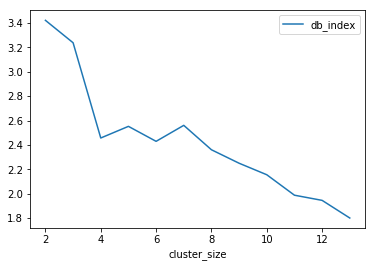

In [8]:
original_res.plot.line(x='cluster_size', y='db_index')

### LDA

In [9]:
lda_res

,cluster_size,db_index
0,2,0.995515
1,3,0.833333
2,4,0.826024
3,5,0.973986
4,6,1.130810
5,7,0.988302
6,8,0.976123
7,9,1.089412
8,10,1.094275
9,11,1.060851


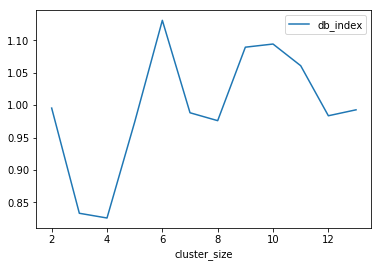

In [10]:
lda_res.plot.line(x='cluster_size', y='db_index')